In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, irfft
import scipy.signal as sig
from scipy.io import wavfile
from scipy.stats import ttest_ind
from playsound import playsound
%matplotlib inline

In [2]:
def gather_data(samplerate,data):
    N = data.shape[0]
    length = N / samplerate
    T0 = length
    dt = T0/N
    time = np.linspace(0., length, data.shape[0])

    return N, length, T0, dt, time   

def cleaning(samplerate,data,freqCutoff):
    
    N, length, T0, dt, time = gather_data(samplerate, data)

    Vdusty = (2/N)*fft(data[:, 1])
    freq = fftfreq(N,dt)
    
    VCleanf = Vdusty.copy()

    for i in range(len(freq)):
        if abs(freq[i]) > freqCutoff:
            VCleanf[i] = 0       

    VClean = ifft(N*VCleanf)
    VC = np.real(VClean)
    return time,VClean,freq

In [3]:
ps_sr, ps_dat = wavfile.read('./peace-sells-intro.wav')

hw_sr, hw_dat = wavfile.read('./holy-wars-intro.wav')

C:\Users\elias\AppData\Local\Temp\ipykernel_19744\726652095.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  ps_sr, ps_dat = wavfile.read('./peace-sells-intro.wav')
C:\Users\elias\AppData\Local\Temp\ipykernel_19744\726652095.py:3: WavFileWarning: Reached EOF prematurely; finished at 16772276 bytes, expected 16772284 bytes from header.
  hw_sr, hw_dat = wavfile.read('./holy-wars-intro.wav')


In [4]:
ps_N, ps_length, ps_T0, ps_dt, ps_time = gather_data(ps_sr, ps_dat)

hw_N, hw_length, ps_T0, hw_dt, hw_time = gather_data(hw_sr, hw_dat)

ps_cutoff = 100

hw_cutoff = 600

ps_time, ps_intro, ps_freq = cleaning(ps_sr, ps_dat, ps_cutoff)

hw_time, hw_intro, hw_freq = cleaning(hw_sr, hw_dat, hw_cutoff)

In [5]:
wavfile.write("./ps_cleaned.wav", ps_sr, np.abs(ps_intro))
wavfile.write("./hw_cleaned.wav", hw_sr, np.abs(hw_intro))

In [6]:
ps_cleaned_fft = (2/ps_N)*fft(ps_intro)
ps_freq = fftfreq(ps_N, ps_dt)

hw_cleaned_fft = (2/hw_N)*fft(hw_intro)
hw_freq = fftfreq(hw_N, hw_dt)


(0.0, 150.0, 0.0, 400.0)

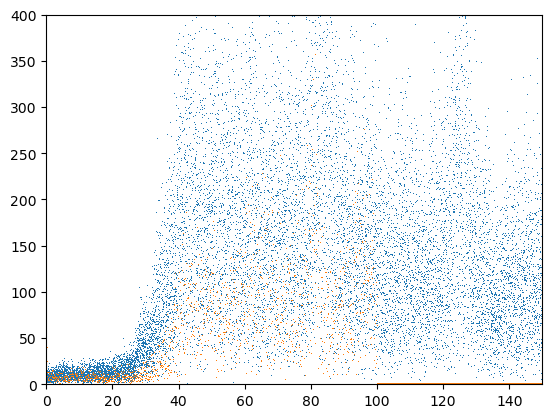

In [7]:
plt.plot(hw_freq[0:hw_N//2], np.abs(hw_cleaned_fft[0:hw_N//2]), marker = ",", linestyle="")

plt.plot(ps_freq[0:ps_N//2], np.abs(ps_cleaned_fft[0:ps_N//2]), marker = ",", linestyle="")

plt.axis([0,150,0,400])

In [8]:
print(ps_freq[1])
print(hw_freq[1])

0.07229547159239813
0.011447492498315073


In [12]:
amp_diff = np.zeros(len(ps_freq))
amp_sum = np.zeros(len(ps_freq))

amp_diff = amp_diff + ps_cleaned_fft

print(np.max(amp_diff))

amp_sum = amp_sum + ps_cleaned_fft

j = 0
for i in range(len(hw_freq)):
    
    if j < len(ps_freq)-2:
        
        if ps_freq[j+1] <= hw_freq[i]:
            j += 1        
        
        dist = ps_freq[j+1] - ps_freq[j]
        f_dist = hw_freq[i] - ps_freq[j]
        norm_f_dist = f_dist/dist
        
#         print(norm_f_dist)
        
        amp_diff[j] -= hw_cleaned_fft[i]*(1-norm_f_dist)
        amp_diff[j+1] -= hw_cleaned_fft[i]*norm_f_dist
        
        amp_sum[j] += hw_cleaned_fft[i]*(1-norm_f_dist)
        amp_sum[j+1] += hw_cleaned_fft[i]*norm_f_dist
        
    else:
        
        amp_diff[j] -= hw_cleaned_fft[i]
        amp_sum[j] += hw_cleaned_fft[i]
             

(329.2326833937667-13.090330516937088j)


In [10]:
print(np.max(ps_cleaned_fft))
print(np.min(amp_diff))
print(amp_diff[-1])

(329.2326833937667-13.090330516937088j)
(-734.1538587704058+158.3941791127904j)
(5.399007986952857+38.7232860802382j)


(-1000.0, 1000.0, 0.0, 1000.0)

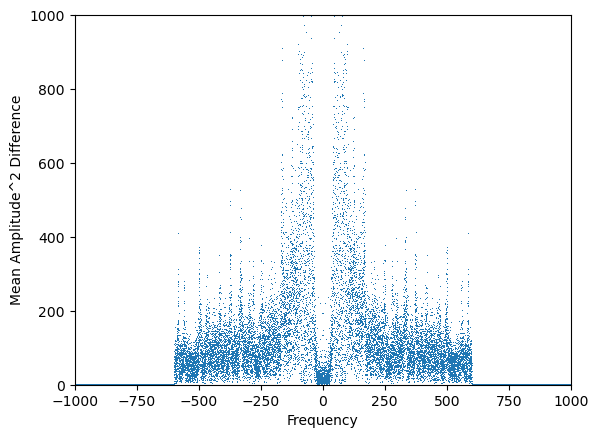

In [15]:
sqr_amp_diff = np.abs(amp_diff)**2/np.abs(amp_sum)

plt.plot(ps_freq,sqr_amp_diff, marker = ",", linestyle="")
plt.xlabel("Frequency")
plt.ylabel("Mean Amplitude^2 Difference")
plt.axis([-1000,1000,0,1000])

In [ ]:
corr[np.where(corr == np.min(corr))]